**Correlation Analysis**

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns

In [4]:
# import the data
data = pd.read_csv('palm_ffb.csv')

In [5]:
df = pd.DataFrame(data)

In [6]:
corr_matrix = df.corr()
print(corr_matrix)

               SoilMoisture  Average_Temp  Min_Temp  Max_Temp  Precipitation  \
SoilMoisture       1.000000     -0.649878  0.015839 -0.499936       0.552001   
Average_Temp      -0.649878      1.000000  0.180396  0.761083      -0.369386   
Min_Temp           0.015839      0.180396  1.000000 -0.124754       0.345944   
Max_Temp          -0.499936      0.761083 -0.124754  1.000000      -0.461117   
Precipitation      0.552001     -0.369386  0.345944 -0.461117       1.000000   
Working_days      -0.057015      0.076321  0.068414 -0.039112       0.127897   
HA_Harvested      -0.326539      0.446515  0.024396  0.314827      -0.265866   
FFB_Yield         -0.003183     -0.005494  0.103830 -0.071201       0.289604   

               Working_days  HA_Harvested  FFB_Yield  
SoilMoisture      -0.057015     -0.326539  -0.003183  
Average_Temp       0.076321      0.446515  -0.005494  
Min_Temp           0.068414      0.024396   0.103830  
Max_Temp          -0.039112      0.314827  -0.071201  
Prec

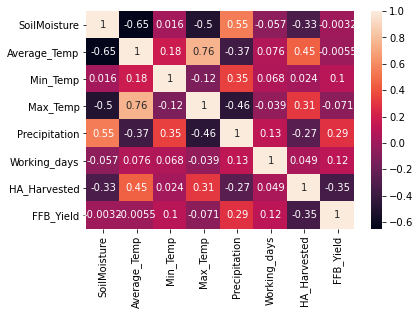

In [7]:
sns.heatmap(corr_matrix, annot = True)
plot.show()

The correrlation analysis shows that:
1. SoilMoisture and Precipitation are highly positively correlated
2. SoilMoisture and Average_Temp are highly negatively correlated
3. FFB_Yeild has strong positive correlation with Percipitation, Wording_days, and Min_Temp, but has strong negative correlation with HA_Harvested

**Linear Regression Model**

In [11]:
df = pd.DataFrame(data)

In [17]:
X = data.drop(['FFB_Yield','Date'],axis=1)
y = data.FFB_Yield

In [18]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [19]:
# Summary of the linear Regression
import statsmodels.api as sm

X = sm.add_constant(X)

#fit linear regression model
model = sm.OLS(y, X).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              FFB_Yield   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     5.935
Date:                Thu, 27 Oct 2022   Prob (F-statistic):           5.92e-06
Time:                        20:25:33   Log-Likelihood:               -0.23443
No. Observations:                 130   AIC:                             16.47
Df Residuals:                     122   BIC:                             39.41
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.7331      1.520      1.798

**Summary**

The linear regression model shows that:
1. SoilMoisture and HA_Harvested has a negative correlation with FFB_Yeild
2. Temperature is not a significant variable in determining FFB_Yeild
3. Precipitation has a positive correlation with FFB_Yeild

# In Summary

From the correlation analysis, we know that Precipitation, working_days, min_temp, and HA_Harvested are correlated with FFB_Yeild and from the linear regression analysis, we got that SoilMoisture, HA_Harvested, and Precipitation are the significant variables. In addition, since SoilMoisture and Precipitation are highly correlated, we can choose to use either of the two variables. Therefore, the determining variables of FFB_Yeild are SoilMoisture/Precipitation and HA_Harvested.